# Convolution and Kernels 

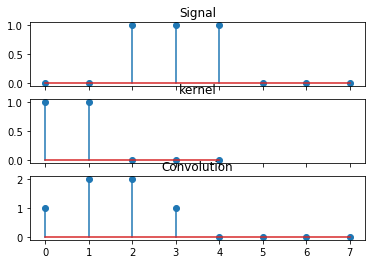

In [1]:
import numpy as np
from scipy.signal import gaussian
import matplotlib.pyplot as plt


def convoluplot(signal, kernel):
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
    ax1.stem(signal)
    ax1.set_title('Signal')
    ax2.stem(kernel)
    ax2.set_title('kernel')
    filtered = np.convolve(signal, kernel, "same")
    ax3.stem(filtered)
    ax3.set_title("Convolution")
    plt.show()

# different signals and kernels for readers to try
#signal = np.zeros(10)
#signal[0:5] = 1
#kernel = np.zeros(10)
#kernel[0:2] = 1
#convoluplot(signal, kernel)

signal = np.array([0, 0, 1, 1, 1, 0, 0, 0])
kernel = np.array([1, 1, 0, 0, 0])
convoluplot(signal, kernel)

## 2D Images and Predefined Kernels for Edge Detection using Convolution

/Users/udaykamath/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/Users/udaykamath/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/Users/udaykamath/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


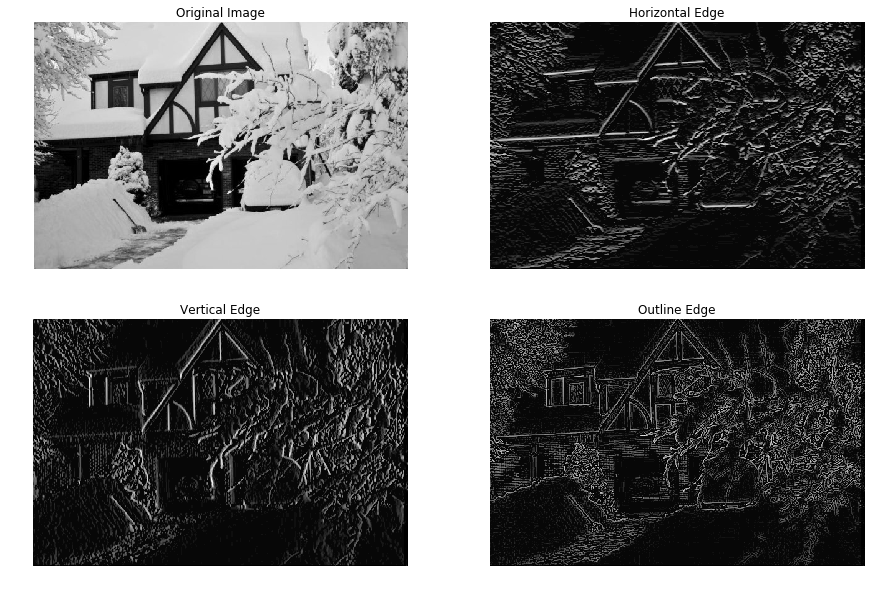

In [2]:
import numpy as np
from PIL import Image
from scipy import misc
from skimage import data
from skimage.color import rgb2gray
import matplotlib.pyplot as plt
from skimage import io, color
import scipy.signal
from skimage import exposure

original_image = io.imread('./figs/House.png')
grey_image = io.imread('./figs/House.png', as_grey=True)

edge_kernel_horizontal = np.array([[-1, -1, -1],
                                   [0, 0, 0],
                                   [1, 1, 1]])
horizontal_edge_detection = scipy.signal.convolve2d(
    grey_image, edge_kernel_horizontal, 'valid')
horizontal_edges_equalized = exposure.equalize_adapthist(
    horizontal_edge_detection /
    np.max(
        np.abs(horizontal_edge_detection)),
    clip_limit=0.03)

edge_kernel_vertical = np.array([[-1, 0, 1],
                                 [-1, 0, 1],
                                 [-1, 0, 1]])
vertical_edge_detection = scipy.signal.convolve2d(
    grey_image, edge_kernel_vertical, 'valid')
vertical_edges_equalized = exposure.equalize_adapthist(
    vertical_edge_detection /
    np.max(
        np.abs(vertical_edge_detection)),
    clip_limit=0.03)

edge_kernel_outline = np.array([[-1, -1, -1],
                                [-1, 8, -1],
                                [-1, -1, -1]])
outline_edge_detection = scipy.signal.convolve2d(
    grey_image, edge_kernel_outline, 'valid')
outline_edges_equalized = exposure.equalize_adapthist(
    outline_edge_detection /
    np.max(
        np.abs(outline_edge_detection)),
    clip_limit=0.03)


f, ax_array = plt.subplots(2, 2)
f.set_figheight(10)
f.set_figwidth(15)
ax_array[0, 0].imshow(original_image)
ax_array[0, 0].set_title('Original Image')
ax_array[0, 0].axis('off')
ax_array[0, 1].imshow(horizontal_edges_equalized, cmap=plt.cm.gray)
ax_array[0, 1].set_title('Horizontal Edge')
ax_array[0, 1].axis('off')
ax_array[1, 0].imshow(vertical_edges_equalized, cmap=plt.cm.gray)
ax_array[1, 0].set_title('Vertical Edge')
ax_array[1, 0].axis('off')
ax_array[1, 1].imshow(outline_edges_equalized, cmap=plt.cm.gray)
ax_array[1, 1].set_title('Outline Edge')
ax_array[1, 1].axis('off')
plt.show()


